# Comparative Analysis: Classical vs Deep Learning Video Classification

This notebook summarizes the performance comparison between classical
feature-based models and deep learning approaches for video
classification using a subset of the UCF-101 dataset.


## Performance Comparison Table


In [3]:
! pip install pandas 


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

data = {
    "Model": [
        "Logistic Regression",
        "SVM",
        "Random Forest",
        "CNN Temporal",
        "R(2+1)D"
    ],
    "Accuracy": [0.90, 0.85, 0.53, 0.875, 0.775],
    "Precision (macro)": [0.90, 0.85, 0.52, 0.88, 0.77],
    "Recall (macro)": [0.90, 0.85, 0.52, 0.88, 0.75],
    "F1-score (macro)": [0.90, 0.85, 0.52, 0.88, 0.75],
}

df = pd.DataFrame(data)
df


,Model,Accuracy,Precision (macro),Recall (macro),F1-score (macro)
0,Logistic Regression,0.900,0.90,0.90,0.90
1,SVM,0.850,0.85,0.85,0.85
2,Random Forest,0.530,0.52,0.52,0.52
3,CNN Temporal,0.875,0.88,0.88,0.88
4,R(2+1)D,0.775,0.77,0.75,0.75


### Performance Interpretation

Logistic Regression achieved the highest overall accuracy (0.90),
indicating that the hand-crafted feature representation is highly
effective for this dataset.

The CNN temporal model achieved competitive performance (0.875),
demonstrating that learned representations can approach classical
feature-based performance even with a relatively small dataset.

SVM also performed well (0.85), confirming that histogram-based feature
vectors are well suited for margin-based classifiers.

Random Forest performed significantly worse (0.53), suggesting that the
feature space does not contain strongly separable axis-aligned decision
boundaries.

The R(2+1)D model achieved moderate performance (0.775), indicating that
3D convolutional models require more data or longer training to fully
capture spatiotemporal dynamics.


Best accuracy achieved: Logistic Regression (0.90)

Best deep learning model: CNN Temporal (0.875)


## Model Accuracy Comparison


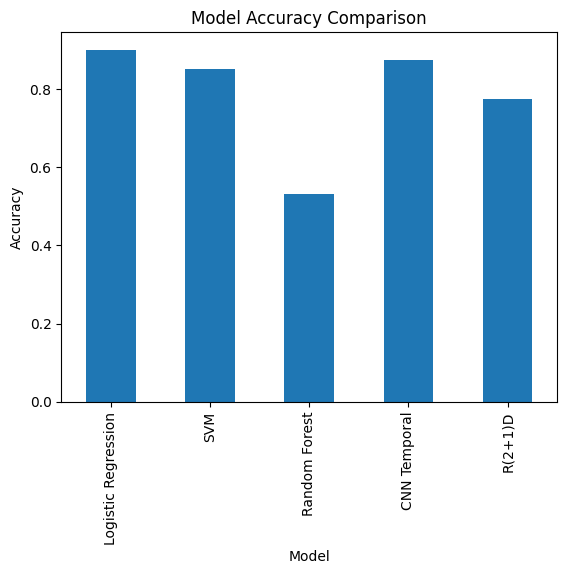

In [2]:
import matplotlib.pyplot as plt

df.set_index("Model")["Accuracy"].plot(kind="bar")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


## Error Analysis

From confusion matrix observations across all models:

Basketball is classified more reliably across models, while most
misclassifications occur between JumpingJack and WalkingWithDog.
These two classes contain repetitive motion patterns that produce
similar motion features, leading to confusion across both classical
and deep learning approaches.

- Classical models confuse motion-heavy actions such as
  JumpingJack and WalkingWithDog.
- Random Forest struggles due to distributed feature importance.
- CNN Temporal model reduces misclassification using learned features.
- R(2+1)D improves temporal understanding but requires more data.

Common failure reasons:
- Similar motion patterns across classes
- Limited dataset size
- Frame sampling limitations


## Computational Analysis

Classical Pipeline:
- Feature extraction time is high.
- Model training is fast on CPU.
- Small model size.

Deep Learning:
- Requires GPU training.
- CNN Temporal trains faster than R(2+1)D.
- R(2+1)D requires more memory and compute.

Inference:
- Classical models are faster after feature extraction.
- Deep learning requires forward pass computation.


### Computational Comparison

| Approach | Training Cost | Inference Cost | Model Size | Hardware |
|---------|--------------|---------------|-----------|---------|
| Classical ML | Low | Very low | Small | CPU |
| CNN Temporal | Medium | Medium | Moderate | GPU |
| R(2+1)D | High | High | Large | GPU |


## Trade-off Analysis

Accuracy vs Computational Cost:
Logistic Regression achieved the highest accuracy with minimal
computational cost, showing the effectiveness of well-designed
hand-crafted features. Deep learning models required significantly more
computation while providing comparable performance.

Data Efficiency:
Classical models performed strongly with only ~300 training videos.
Deep learning models typically require larger datasets to outperform
feature-based approaches.

Interpretability vs Performance:
Classical features (color histogram, LBP, motion statistics) are
interpretable, while deep learning models learn abstract
representations.

Overall:
Classical methods are efficient and reliable for small datasets,
while deep learning models are more scalable for large video datasets.


## Deployment Considerations

Edge deployment:
Classical models are suitable due to low memory and CPU inference.

Cloud deployment:
Deep learning models benefit from GPU infrastructure.

Real-time feasibility:
CNN Temporal may support real-time inference with GPU.
R(2+1)D requires optimization for real-time usage.

Maintenance:
Classical pipelines require manual feature updates.
Deep learning models can be fine-tuned with new data.


## Conclusion

This project compared classical feature-based methods and deep learning
approaches for video classification.

Logistic Regression achieved the highest accuracy among classical models.
The CNN temporal model achieved strong performance among deep learning
approaches.

The experiments demonstrate the trade-offs between computational
efficiency, interpretability, and representation learning.

### Representation Learning Insight

The strong performance of classical models suggests that low-level
appearance and motion statistics are sufficient to distinguish the
selected action classes. This indicates that dataset complexity is
moderate and does not require deep hierarchical feature learning.
